<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 30px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Đồ án thực hành Cuối kỳ - Nhập môn Khoa học Dữ liệu  
</div>

### Giảng viên hướng dẫn:
- Thầy Lê Nhựt Nam
- Cô Nguyễn Thị Thu Hằng
- Thầy Trần Quốc Huy
### Thông tin nhóm: Nhóm 23
| HỌ TÊN                | MSSV      |
|:------------------    |:--------: |
| Lê Trần Minh Khuê     | 21120279  |
| Hoàng Trung Nam       | 21120290  |
| Phan Cao Nguyên       | 21120299  |
| Nguyễn Phương    Thảo | 21120336  |

### Chủ đề: Heart Attack Analysis & Prediction


<div style="text-align: left; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 5px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Pha 02 – Xây dựng mô hình dữ liệu và đánh giá 📌
</div>

Thêm các thư viện cần thiết

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
sns.set(style="whitegrid")

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

# I. Nhập dữ liệu 

In [2]:
_2019_df = pd.read_csv('Data/2019_df.csv')
_2019_df.sample(10)

,locationabbr,locationdesc,data_value,sex,race/ethnicityage_group,locationid,y_lat,x_lon
6821,FL,Sumter County,146.9,Overall,Asian and Pacific Islander,12119,28.702656,-82.078424
51623,TX,Hall County,NaN,Overall,American Indian and Alaskan Native,48191,34.530832,-100.682683
50898,TX,Kerr County,NaN,Overall,Asian and Pacific Islander,48265,30.067798,-99.353276
2901,AR,Cleveland County,NaN,Overall,American Indian and Alaskan Native,5025,33.904864,-92.177151
29348,MT,Custer County,331.4,Overall,Overall,30017,46.254681,-105.576117
33012,ND,Pembina County,NaN,Overall,American Indian and Alaskan Native,38067,48.768553,-97.547074
40836,OR,Union County,NaN,Female,Black,41061,45.299759,-118.006673
36976,NY,Queens County,257.0,Overall,Hispanic,36081,40.713938,-73.817592
37321,NY,Dutchess County,NaN,Overall,American Indian and Alaskan Native,36027,41.766868,-73.742188
4230,CA,Marin County,145.3,Male,Asian and Pacific Islander,6041,38.073054,-122.720201


# II. Xác định bài toán quan tâm trên tập dữ liệu
**Bài toán:** Dự đoán tỷ lệ tử vong (số ca trên 100.000 dân) trong những năm tiếp theo.

**Ý Nghĩa:**

- Về các vấn đề sức khoẻ nói chung và bệnh tim mạch nói riêng: Tỷ lệ tử vong vì bệnh trong một năm là thước đo tình hình sức khoẻ trong cộng đồng vào năm đó. Thể hiện xu hướng và mức độ nghiêm trọng của bệnh lý này (ở đây cụ thể là bệnh tim mạch liên quan đến tăng huyết áp cục bộ)  
      => Cho biết tình hình có thể được cải thiện hay diễn biến xấu đi, từ đó đưa ra giải pháp phù hợp.


# III. Thao tác với đặc trưng

## Lựa chọn đặc trưng

Những đặc trưng quan trọng cho bài toán mà chúng ta có thể chọn từ tập dữ liệu là `sex` và `race/ethnicityage_group`.  

Ta không chọn các đặc trưng còn lại do hầu hết là các thông tin cố định về địa lý (Tên, Mã ban, Mã quận, kinh độ, vĩ độ). Chủ yếu đóng góp cho việc quan sát phân bố của dữ liệu trên các khu vực địa lý.

Để hỗ trợ cho việc phân tích và xây dựng mô hình, chuẩn hóa các giá trị string của 2 nhóm **sex** và **race/ethnicityage_group** thành int theo chuẩn dưới đây:
- **Sex:**
  - Overall: 0
  - Male: 1
  - Female: 2
- **Race/Ethnicityage:**
  - Overall: 0
  - White: 1
  - Black: 2
  - Hispanic: 3
  - Asian and Pacific Islander: 4 
  - American Indian and Alaskan Native: 5

In [3]:
race_group = {'Overall': 0, 'White': 1, 'Black': 2, 'Hispanic': 3, 'Asian and Pacific Islander': 4, 'American Indian and Alaskan Native': 5}
sex_group = {'Overall': 0, 'Male': 1, 'Female': 2}

In [4]:
_2019_df['sex'] = _2019_df['sex'].map(sex_group)
_2019_df['race/ethnicityage_group'] = _2019_df['race/ethnicityage_group'].map(race_group)

In [5]:
_2019_df

,locationabbr,locationdesc,data_value,sex,race/ethnicityage_group,locationid,y_lat,x_lon
0,AK,Aleutians East,182.4,0,0,2013,55.442393,-161.959930
1,AK,Aleutians West,172.6,0,0,2016,53.648343,-166.917533
2,AK,Anchorage,255.6,0,0,2020,61.159145,-149.104559
3,AK,Bethel,343.4,0,0,2050,60.923648,-159.753262
4,AK,Bristol Bay,NaN,0,0,2060,58.753496,-156.694662
...,...,...,...,...,...,...,...,...
59089,WY,Wyoming,NaN,1,4,56,42.998400,-107.552000
59090,WY,Wyoming,NaN,2,4,56,42.998400,-107.552000
59091,WY,Wyoming,338.4,0,5,56,42.998400,-107.552000
59092,WY,Wyoming,432.2,1,5,56,42.998400,-107.552000


**Chọn sample:** Chọn bang có nhiều mẫu nhất để phân tích

In [6]:
_2019_df['locationdesc'].value_counts()

locationdesc
Washington County      540
Jefferson County       450
Lincoln County         414
Franklin County        414
Jackson County         414
                      ... 
Oxford County           18
Kennebec County         18
Aroostook County        18
Androscoggin County     18
Wyoming                 18
Name: count, Length: 2022, dtype: int64

Bang có nhiều dữ liệu nhất là **Washington County**

In [7]:
washington_df = _2019_df[_2019_df['locationdesc'] == 'Washington County']
washington_df

,locationabbr,locationdesc,data_value,sex,race/ethnicityage_group,locationid,y_lat,x_lon
604,AL,Washington County,410.5,0,0,1129,31.412940,-88.205917
671,AL,Washington County,570.6,1,0,1129,31.412940,-88.205917
738,AL,Washington County,301.7,2,0,1129,31.412940,-88.205917
805,AL,Washington County,407.3,0,1,1129,31.412940,-88.205917
872,AL,Washington County,546.9,1,1,1129,31.412940,-88.205917
...,...,...,...,...,...,...,...,...
57342,WI,Washington County,230.4,1,4,55131,43.372311,-88.226499
57414,WI,Washington County,158.1,2,4,55131,43.372311,-88.226499
57486,WI,Washington County,397.2,0,5,55131,43.372311,-88.226499
57558,WI,Washington County,817.1,1,5,55131,43.372311,-88.226499


Chia giá trị data value theo trung vị để được 2 tập giá trị bằng nhau và chuẩn hóa sang nhị phân.

In [8]:
median_data_value = washington_df['data_value'].median()
median_data_value

318.1

In [9]:
washington_df['data_value'] = (washington_df['data_value'] > median_data_value).astype(int)
washington_df

,locationabbr,locationdesc,data_value,sex,race/ethnicityage_group,locationid,y_lat,x_lon
604,AL,Washington County,1,0,0,1129,31.412940,-88.205917
671,AL,Washington County,1,1,0,1129,31.412940,-88.205917
738,AL,Washington County,0,2,0,1129,31.412940,-88.205917
805,AL,Washington County,1,0,1,1129,31.412940,-88.205917
872,AL,Washington County,1,1,1,1129,31.412940,-88.205917
...,...,...,...,...,...,...,...,...
57342,WI,Washington County,0,1,4,55131,43.372311,-88.226499
57414,WI,Washington County,0,2,4,55131,43.372311,-88.226499
57486,WI,Washington County,1,0,5,55131,43.372311,-88.226499
57558,WI,Washington County,1,1,5,55131,43.372311,-88.226499


Optimization terminated successfully.
         Current function value: 0.429986
         Iterations 7


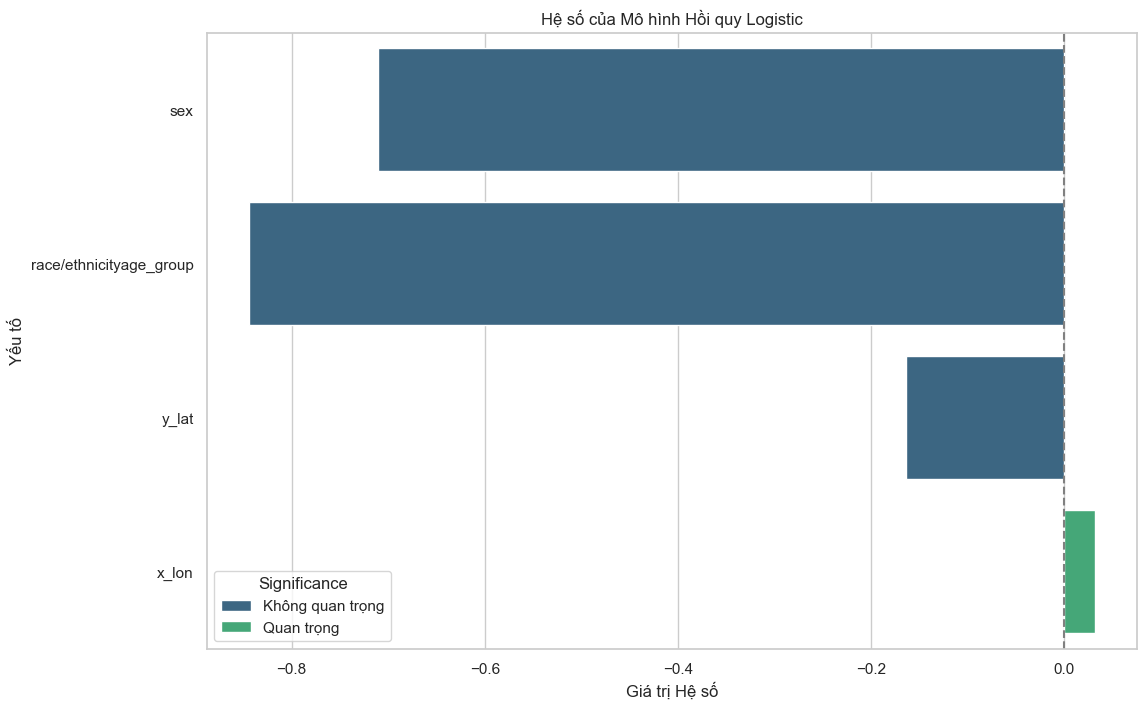

,Factors,Coefficients,P-Values,Significance
0,sex,-0.710251,1.463908e-06,Không quan trọng
1,race/ethnicityage_group,-0.844096,1.824565e-23,Không quan trọng
2,y_lat,-0.164191,1.164790e-08,Không quan trọng
3,x_lon,0.031358,2.803003e-03,Quan trọng


In [10]:
# Chuẩn bị dữ liệu cho hồi quy logistic
X = washington_df.drop(columns={'locationabbr', 'locationdesc', 'locationid', 'data_value'}, axis=1)  # Xóa các biến độc lập
y = washington_df['data_value']  # Biến phụ thuộc

X_const = sm.add_constant(X)

# Xây dựng mô hình hồi quy logistic
model = sm.Logit(y, X_const)
result = model.fit()

# Trích xuất hệ số và giá trị p
coefficients = result.params[1:]  # Loại bỏ hằng số
p_values = result.pvalues[1:]  # Loại bỏ hằng số cho giá trị p

# Tạo DataFrame để hiển thị
viz_df = pd.DataFrame({
    'Factors': coefficients.index,
    'Coefficients': coefficients.values,
    'P-Values': p_values.values
})

# Thêm cột cho sự quan trọng của hệ số
viz_df['Significance'] = np.where(viz_df['P-Values'] >= 1e-5, 'Quan trọng', 'Không quan trọng')

# Vẽ biểu đồ hệ số
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficients', y='Factors', data=viz_df, hue='Significance', dodge=False, palette='viridis')
plt.title('Hệ số của Mô hình Hồi quy Logistic')
plt.xlabel('Giá trị Hệ số')
plt.ylabel('Yếu tố')
plt.axvline(x=0, color='grey', linestyle='--')

plt.show()
viz_df

**Comment:** Việc visualizing các hệ số từ mô hình hồi quy logistic cung cấp cái nhìn sâu sắc về các yếu tố có liên quan chặt chẽ nhất đến sự hiện diện của bệnh tim:

- **Các yếu tố quan trọng:**
    - Giới tính: với hệ số âm, nam giới có ảnh hưởng tới xác suất dự đoán thấp hơn so với nữ giới.
    - Chủng tộc: tỉ lệ thành phần sắc tộc càng thấp, càng ảnh hưởng thấp tới xác suất dự đoán. 

- **Yếu tố không quan trọng:**
Vị trí địa lý(x_lon, y_lat): Các yếu tố này không cho thấy mối liên quan đáng kể với sự hiện diện bệnh tim trong tập dữ liệu này.

Các hệ số cung cấp ước tính về sự thay đổi trong log tỷ lệ mắc bệnh tim, trong các xử lý tiếp theo, có thể bỏ qua các thông tin về vị trí địa lý.

## Khai thác đặc trưng

In [11]:
median_data_value = _2019_df['data_value'].median()

In [12]:
_2019_df['data_value'] = (_2019_df['data_value'] > median_data_value).astype(int)

In [13]:
# Preparing the data with significant features for logistic regression
X_significant_features = _2019_df[['sex', 'race/ethnicityage_group']]
y = _2019_df['data_value']

# Adding a constant to the model (intercept)
X_const_significant_features = sm.add_constant(X_significant_features)

# Building the logistic regression model with significant features
model_significant_features = sm.Logit(y, X_const_significant_features)
result_significant_features = model_significant_features.fit()

# Getting the summary of the logistic regression with significant features
logit_summary_significant_features = result_significant_features.summary2()
logit_summary_significant_features

Optimization terminated successfully.
         Current function value: 0.451420
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
=========================================================================
Model:                  Logit              Method:             MLE       
Dependent Variable:     data_value         Pseudo R-squared:   0.239     
Date:                   2024-01-05 14:42   AIC:                53358.4109
No. Observations:       59094              BIC:                53385.3715
Df Model:               2                  Log-Likelihood:     -26676.   
Df Residuals:           59091              LL-Null:            -35037.   
Converged:              1.0000             LLR p-value:        0.0000    
No. Iterations:         6.0000             Scale:              1.0000    
-------------------------------------------------------------------------
                         Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
const                    1.2603   0.0223   56.5866 0.0000  1.2167  1.3040
sex                     -0.6093   0.0135  -44.9962 0.0000 -0.6359 -0.5828
race/ethnicityage_group -0.8002   0.0078 -103.0198 0.0000 -0.8154 -0.7850
=========================================================================

"""

**1. Đặc trưng:**
- sex: -0.5858 - Hệ số cho biến "sex". Nếu là nam, giả sử nguy cơ giảm khoảng 0.56 lần so với nữ.
- race/ethnicityage_group: -0.3653 - Hệ số cho biến "race/ethnicityage_group". Mỗi đơn vị tăng(tăng theo tỉ lệ thành phần sắc tộc), nguy cơ giảm khoảng 0.69 lần.  


**2. Kiểm Định Thống Kê:** Cả ba hệ số đều có giá trị p-value rất thấp (0.0000), chỉ ra rằng chúng có ý nghĩa thống kê.

**3. Độ hội tụ:** Sau 5 lần lặp thì mô hình đã hội tụ, vậy mô hình đã tối ưu, giải pháp ổn định. Khi thêm các đặc trưng, sẽ không làm cho mô hình phức tạp hơn.

# IV. Dự đoán data_value

In [14]:
df = pd.read_csv('Data/smoothed_rate_df.csv')

**Chọn sample:** Chọn bang có nhiều mẫu nhất để phân tích

In [15]:
location = df['locationdesc']
location.groupby(location).count().sort_values(ascending=False).head(10)

locationdesc
Washington    5140
Jefferson     4460
Franklin      3820
Jackson       3820
Montgomery    3440
Madison       3360
Lincoln       3100
Union         3080
Marion        2940
Monroe        2820
Name: locationdesc, dtype: int64

Bang có nhiều dữ liệu nhất là **Washington County**

**Sample:** Dữ liệu được chọn
- Giới tính(sex): Overall
- Sắc tộc(race/ethnicityage_group): Overall
- Tuổi(age_group): Ages 65+ years
- Địa điểm(locationdesc): Washington

In [16]:
fr_df = df[(df['sex'] == 'Overall') & (df['race/ethnicityage_group'] == 'Overall') & (df['age_group'] == 'Ages 65+ years') & (df['locationdesc'] == 'Washington')]
fr_df

,locationid,year,locationabbr,locationdesc,age_group,race/ethnicityage_group,sex,x_long,y_lat,data_value,confidence_limit_low,confidence_limit_high
12540,1129,2000,AL,Washington,Ages 65+ years,Overall,Overall,-88.208190,31.407577,517.5,441.5,624.5
12541,1129,2001,AL,Washington,Ages 65+ years,Overall,Overall,-88.208190,31.407577,525.1,450.5,623.4
12542,1129,2002,AL,Washington,Ages 65+ years,Overall,Overall,-88.208190,31.407577,567.8,475.3,695.9
12543,1129,2003,AL,Washington,Ages 65+ years,Overall,Overall,-88.208190,31.407577,589.9,504.5,682.8
12544,1129,2004,AL,Washington,Ages 65+ years,Overall,Overall,-88.208190,31.407577,634.5,545.1,769.7
...,...,...,...,...,...,...,...,...,...,...,...,...
467545,50023,2015,VT,Washington,Ages 65+ years,Overall,Overall,-72.614273,44.273773,504.6,439.7,588.5
467546,50023,2016,VT,Washington,Ages 65+ years,Overall,Overall,-72.614273,44.273773,499.6,413.7,575.3
467547,50023,2017,VT,Washington,Ages 65+ years,Overall,Overall,-72.614273,44.273773,544.2,473.1,637.0
467548,50023,2018,VT,Washington,Ages 65+ years,Overall,Overall,-72.614273,44.273773,563.1,473.9,655.7


## Đánh giá thuật toán

In [17]:
# Xử lý data_value
fr_df['data_value'] = pd.to_numeric(fr_df['data_value'], errors='coerce')  # Chuyển đổi 'data_value' thành số
fr_df['data_value_scaled'] = StandardScaler().fit_transform(fr_df[['data_value']])
fr_df['data_value_log'] = np.log1p(fr_df['data_value'])

# Chọn các đặc trưng (features) để làm dự đoán
features = fr_df[['year', 'data_value_scaled', 'data_value_log']]
target = fr_df['data_value'] # Chọn biến phụ thuộc để dự đoán

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Khởi tạo một vài model
models = {
    'Polynomial Regression': make_pipeline(PolynomialFeatures(4), LinearRegression()),
    'Support Vector Regression': SVR(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression()
}

# Đào tạo và đánh giá từng mô hình
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print(f"{model_name} - Mean Squared Error: {mse}")

Polynomial Regression - Mean Squared Error: 5.908205536173515e-11
Support Vector Regression - Mean Squared Error: 51518.3993657889
Decision Tree Regression - Mean Squared Error: 23.17594827586215
Random Forest Regression - Mean Squared Error: 497.9856942327579
Linear Regression - Mean Squared Error: 3.0139056532272896e-26


Với Mean Squared Error (MSE) rất thấp của Polynomial Regression và Linear Regression, được xem là một kết quả tốt, chỉ ra rằng mô hình của có khả năng dự đoán rất gần với giá trị thực tế. Vậy 2 mô hình đã nêu trên có thể được dùng để dự đoán data_value.

Mean Squared Error (Polynomial Regression): 5.908205536173515e-11


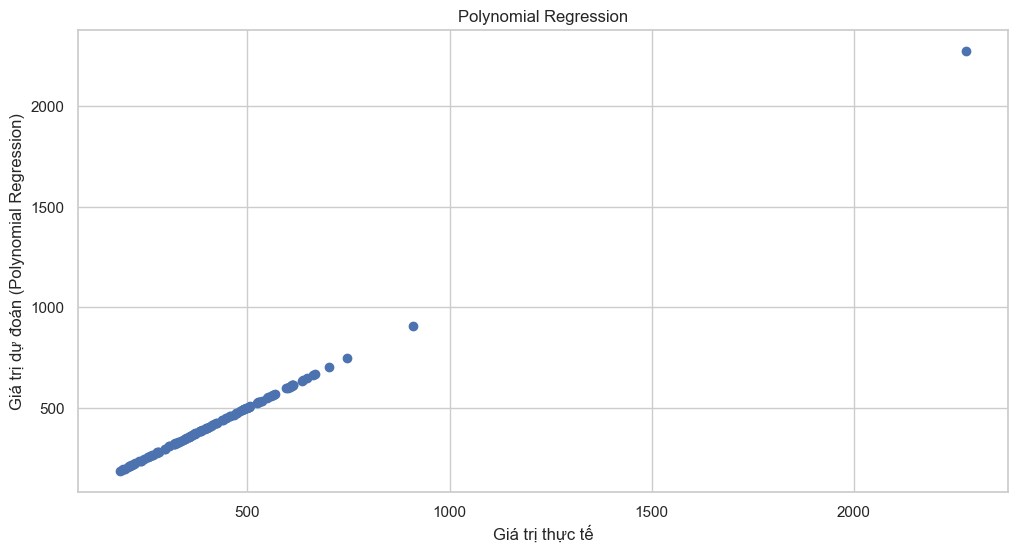

Mean Squared Error (Linear Regression): 3.0139056532272896e-26


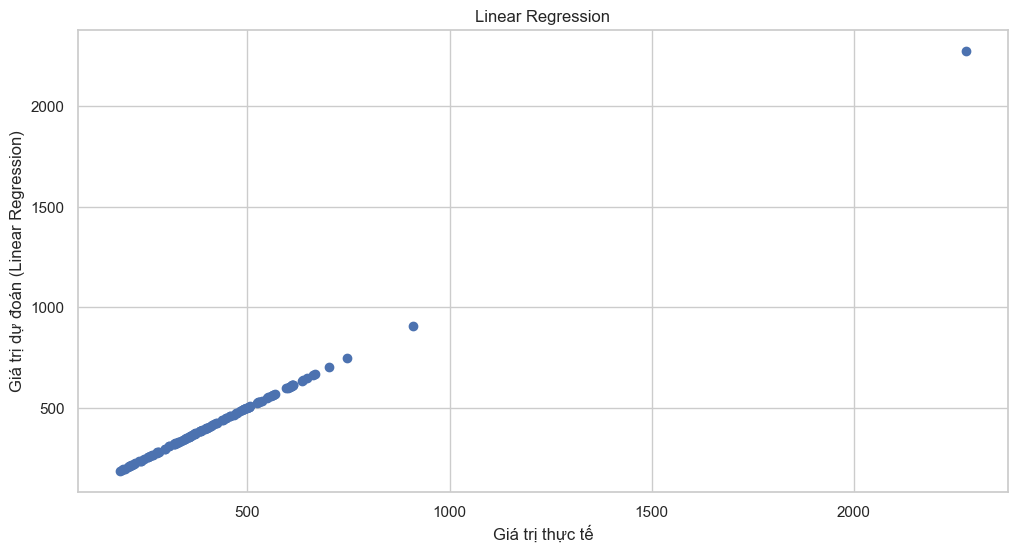

In [18]:
# Khởi tạo mô hình Polynomial Regression bậc 4
degree = 4
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Huấn luyện mô hình Polynomial Regression trên tập huấn luyện
poly_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
poly_predictions = poly_model.predict(X_test)

# Đánh giá hiệu suất của mô hình Polynomial Regression
poly_mse = mean_squared_error(y_test, poly_predictions)
print(f'Mean Squared Error (Polynomial Regression): {poly_mse}')

# Vẽ đồ thị cho Polynomial Regression
plt.figure(figsize=(12, 6))
plt.scatter(y_test, poly_predictions)
plt.xlabel("Giá trị thực tế")
plt.ylabel("Giá trị dự đoán (Polynomial Regression)")
plt.title('Polynomial Regression')
plt.show()

# Khởi tạo mô hình Linear Regression
linear_model = LinearRegression()

# Huấn luyện mô hình Linear Regression trên tập huấn luyện
linear_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
linear_predictions = linear_model.predict(X_test)

# Đánh giá hiệu suất của mô hình Linear Regression
linear_mse = mean_squared_error(y_test, linear_predictions)
print(f'Mean Squared Error (Linear Regression): {linear_mse}')

# Vẽ đồ thị cho Linear Regression
plt.figure(figsize=(12, 6))
plt.scatter(y_test, linear_predictions)
plt.xlabel("Giá trị thực tế")
plt.ylabel("Giá trị dự đoán (Linear Regression)")
plt.title('Linear Regression')
plt.show()

## Dự đoán data_value cho năm 2020

Dự đoán giá trị cho năm 2020 (Polynomial Regression): 586.3443142771721
Dự đoán giá trị cho năm 2020 (Linear Regression): 485.10568058076296


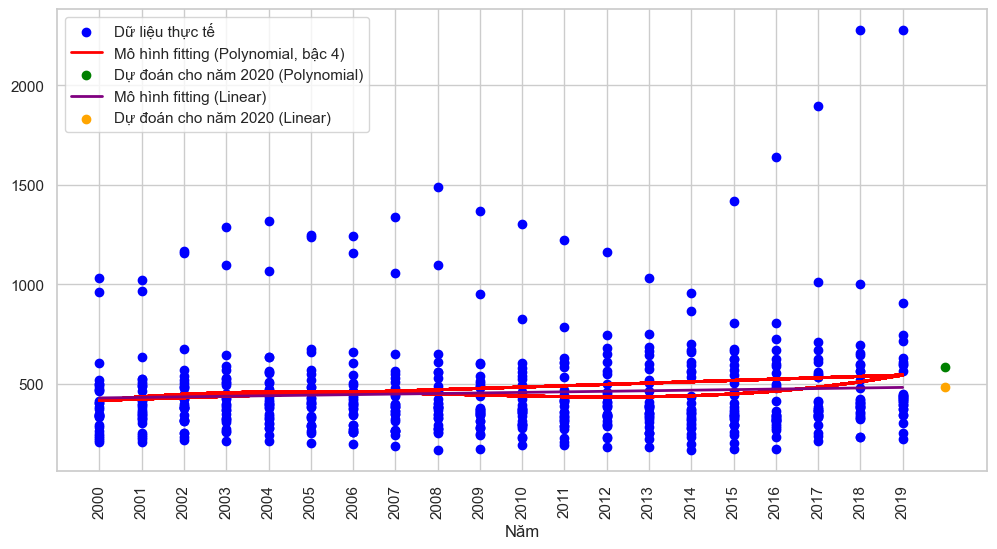

In [19]:
# Chuẩn bị dữ liệu cho fitting
X = fr_df[['year']]
y = fr_df['data_value']

# Chọn mô hình đa thức bậc 4
degree = 4
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Thực hiện fitting cho Polynomial Regression
poly_model.fit(X, y)

# Dự đoán giá trị cho năm 2020 (Polynomial Regression)
X_2020 = [[2020]]
predicted_value_2020_poly = poly_model.predict(X_2020)
print("Dự đoán giá trị cho năm 2020 (Polynomial Regression):", predicted_value_2020_poly[0])

# Khởi tạo mô hình Linear Regression
linear_model = LinearRegression()

# Thực hiện fitting cho Linear Regression
linear_model.fit(X, y)

# Dự đoán giá trị cho năm 2020 (Linear Regression)
predicted_value_2020_linear = linear_model.predict(X_2020)
print("Dự đoán giá trị cho năm 2020 (Linear Regression):", predicted_value_2020_linear[0])

# Vẽ đồ thị
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Dữ liệu thực tế')
plt.plot(X, poly_model.predict(X), color='red', linewidth=2, label=f'Mô hình fitting (Polynomial, bậc {degree})')
plt.scatter(2020, predicted_value_2020_poly, color='green', marker='o', label='Dự đoán cho năm 2020 (Polynomial)')

plt.plot(X, linear_model.predict(X), color='purple', linewidth=2, label='Mô hình fitting (Linear)')
plt.scatter(2020, predicted_value_2020_linear, color='orange', marker='o', label='Dự đoán cho năm 2020 (Linear)')

plt.xticks(fr_df['year'].unique(), rotation=90)
plt.xlabel('Năm')
plt.legend()
plt.show()


In [20]:
# Data_value trung bình năm 2019
#fr_df['data_value'][fr_df['year'] == 2019].mean()

**Comment:** 
<!-- - data_value dự đoán của năm 2020 sử dụng poly_model lớn hơn với data_value trung bình của năm 2019 (586 > 529).
- data_value dự đoán của năm 2020 sử dụng linear_model lớn hơn với data_value trung bình của năm 2019 (485 < 529). -->
<!-- - Xu hướng gia tăng của data_value qua các năm. -->

Nếu đường đi của cả hai mô hình (Polynomial Regression và Linear Regression) trong quá trình fitting gần như tăng dần theo từng năm, có thể có một số quy luật hoặc xu hướng trong dữ liệu. Điều này có thể là một dấu hiệu tích cực, vì mô hình có thể đang cố gắng bắt chước xu hướng tổng quát trong dữ liệu. Vì vậy các giá trị được dự đoán trong năm 2020 của 2 model có thể được sử dụng.

In [21]:
fr_df['data_value'][fr_df['year'] == 2019]

12559      416.0
29599     2276.6
53029      391.7
71149      609.3
98129      344.0
106230     431.9
121969     444.2
137811     716.4
152849     437.3
166469     416.1
184810     343.3
197229     253.8
200149     301.7
204969     744.4
234589     372.8
249689     599.9
268149     425.6
284209     593.7
312249     376.1
331929     630.1
353570     428.4
367389     908.7
373809     394.4
385850     446.8
387689     424.1
419069     441.0
459089     402.8
465529     225.1
467549     567.0
Name: data_value, dtype: float64

In [35]:
# Lưu lại các thông số của 2 mô hình để triển khai (deploy).
import joblib

# Chọn mô hình đa thức bậc 4
degree = 4
model_PL4 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
# Thực hiện fitting cho Polynomial Regression
model_PL4.fit(X, y)
# Lưu các thông số của mô hình vào file 
joblib.dump(model_PL4, "./Deploy/PL4_model.sav")


# Khởi tạo mô hình Linear Regression
model_linear = LinearRegression()
# Thực hiện fitting cho Linear Regression
model_linear.fit(X, y)
# Lưu các thông số của mô hình vào file 
joblib.dump(model_linear, "./Deploy/LN_model.sav")

['./Deploy/LN_model.sav']

# III. Phân loại
So sánh lựa chọn mô hình thích hợp cho việc phân loại data_value dựa trên sex và race/ethnicityage

## Chia dữ liệu

In [23]:
X = _2019_df[['race/ethnicityage_group', 'sex']]
y = _2019_df['data_value']

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Decision Tree Classifier

In [25]:
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [26]:
y_prediction = DT.predict(X_test)
tree_train_acc = round(accuracy_score(y_train,DT.predict(X_train))*100,2)
tree_test_acc = round(accuracy_score(y_test,y_prediction)*100,2)
print('Accuracy = ' , tree_test_acc,' %')

Accuracy =  82.52  %


In [27]:
y_prediction

array([0, 1, 0, ..., 1, 0, 0])

In [28]:
print(classification_report(

    y_test,
    DT.predict(X_test)

))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      8563
           1       0.65      0.78      0.71      3256

    accuracy                           0.83     11819
   macro avg       0.78      0.81      0.79     11819
weighted avg       0.84      0.83      0.83     11819



## Random Forest Classifier

In [29]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier()

In [30]:
y_prediction = RF.predict(X_test)
rdm_train_acc = round(accuracy_score(y_train,RF.predict(X_train))*100,2)
rdm_test_acc = round(accuracy_score(y_test,y_prediction)*100,2)
print('Accuracy = ' , rdm_test_acc,' %')

Accuracy =  82.52  %


In [31]:
print(classification_report(

    y_test,
    RF.predict(X_test)

))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      8563
           1       0.65      0.78      0.71      3256

    accuracy                           0.83     11819
   macro avg       0.78      0.81      0.79     11819
weighted avg       0.84      0.83      0.83     11819



## Logistic Regression Classifier

In [32]:
LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [33]:
y_prediction = LR.predict(X_test)
lr_train_acc = round(accuracy_score(y_train,LR.predict(X_train))*100,2)
lr_test_acc = round(accuracy_score(y_test,y_prediction)*100,2)
print('Accuracy = ',lr_test_acc ,' %')

Accuracy =  74.3  %


In [34]:
print(classification_report(

    y_test,
    LR.predict(X_test)

))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      8563
           1       0.54      0.43      0.48      3256

    accuracy                           0.74     11819
   macro avg       0.67      0.65      0.65     11819
weighted avg       0.73      0.74      0.73     11819



## Kết luận:
2 mô hình **Decision Tree Classifier** và **Random Forest Classifier** thích hợp cho việc phân loại bộ dữ liệu với với accuracy = 79%